<a href="https://colab.research.google.com/github/EDPS-7532/cakd5_web/blob/main/DL_using_convnets_with_small_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install keras==2.3.1
!pip install tensorflow==2.2.0

     |████████████████████████████████| 377 kB 5.1 MB/s 
     |████████████████████████████████| 50 kB 6.1 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
tensorflow 2.8.0 requires keras<2.9,>=2.8.0rc0, but you have keras 2.3.1 which is incompatible.
     |████████████████████████████████| 516.2 MB 3.9 kB/s 
     |████████████████████████████████| 3.0 MB 41.6 MB/s 
     |████████████████████████████████| 454 kB 64.4 MB/s 
     |████████████████████████████████| 2.9 MB 53.9 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import tensorflow as tf
tf.__version__

'2.2.0'

In [4]:
import keras
keras.__version__

Using TensorFlow backend.


'2.3.1'

소규모 데이터 셋에서 컨브넷 훈련하기
4000개의 강아지 고양이 사진으로 구성된 데이터셋을 train 2000, validataion 1000, test 1000개로 분리하여 사용.
 - 과대 적합 여부 확인
 - 데이터 증식을 통한 네트워크의 성능 개선
 - 사전 훈련된 네트워크를 활용

## 작은 데이터셋 문제에서 딥러닝의 타당성

딥러닝은 데이터가 풍부할 때만 작동한다는 말을 이따금 듣습니다. 부분적으로는 맞습니다. 딥러닝의 근본적인 특징은 훈련 데이터에서 특성 공학의 수작업 없이 흥미로운 특성을 찾을 수 있는 것입니다. 이는 훈련 샘플이 많아야만 가능합니다. 입력 샘플이 이미지와 같이 매우 고차원인 문제에서는 특히 그렇습니다.

- 많은 샘플이 의미하는 것은 상대적
- 복잡한 문제를 푸는 컨브넷을 수십 개의 샘플만을 사용해서 훈련하는 것은 불가능
- 컨브넷은 지역적이고 평행 이동으로 변하지 않는 특성을 학습하기 때문에 지각에 관한 문제에서 매우 효율적으로 데이터를 사용
- 매우 작은 이미지 데이터셋에서 어떤 종류의 특성 공학을 사용하지 않고 컨브넷을 처음부터 훈련해도 납득할 만한 결과를 만들 수 있다.

- 딥러닝 모델은 태생적으로 매우 다목적
- 대규모 데이터셋에서 훈련시킨 이미지 분류 모델이나 스피치-투-텍스트 모델을 조금만 변경해서 완전히 다른 문제에 재사용
- 특히 컴퓨터 비전에서는 (보통 ImageNet 데이터셋에서 훈련된) 사전 훈련된 모델들이 다운로드받을 수 있도록 많이 공개되어 있어서 매우 적은 데이터에서 강력한 비전 모델을 만드는데 사용할 수 있다.


In [5]:
!pwd

/content


In [6]:
import os, shutil

In [19]:
import os, shutil
# 원본 데이터셋을 압축 해제한 디렉터리 경로
original_dataset_dir = '/content/drive/MyDrive/팀 프로젝트/cats_and_dogs'

# 소규모 데이터셋을 저장할 디렉터리
base_dir = './drive/MyDrive/MKS/과정9_딥러닝알고리즘구현/cats_and_dogs_small'
if os.path.exists(base_dir):  # 반복적인 실행을 위해 디렉토리를 삭제합니다.
    shutil.rmtree(base_dir)   # 이 코드는 책에 포함되어 있지 않습니다. 지정된 폴더, 하위 디렉토리 폴더, 파일 모두 삭제
os.mkdir(base_dir)

# 훈련, 검증, 테스트 분할을 위한 디렉터리
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# 훈련용 고양이 사진 디렉터리
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# 훈련용 강아지 사진 디렉터리
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# 검증용 고양이 사진 디렉터리
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# 검증용 강아지 사진 디렉터리
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# 테스트용 고양이 사진 디렉터리
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# 테스트용 강아지 사진 디렉터리
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# 처음 1,000개의 고양이 이미지를 train_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# 다음 500개 고양이 이미지를 validation_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 고양이 이미지를 test_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 처음 1,000개의 강아지 이미지를 train_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 강아지 이미지를 validation_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 강아지 이미지를 test_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [8]:
import os, shutil
base_dir = './drive/MyDrive/MKS/과정9_딥러닝알고리즘구현/cats_and_dogs_small'


# 훈련, 검증, 테스트 분할을 위한 디렉터리
train_dir = os.path.join(base_dir, 'train')

validation_dir = os.path.join(base_dir, 'validation')

test_dir = os.path.join(base_dir, 'test')


# 훈련용 고양이 사진 디렉터리
train_cats_dir = os.path.join(train_dir, 'cats')


# 훈련용 강아지 사진 디렉터리
train_dogs_dir = os.path.join(train_dir, 'dogs')


# 검증용 고양이 사진 디렉터리
validation_cats_dir = os.path.join(validation_dir, 'cats')


# 검증용 강아지 사진 디렉터리
validation_dogs_dir = os.path.join(validation_dir, 'dogs')


# 테스트용 고양이 사진 디렉터리
test_cats_dir = os.path.join(test_dir, 'cats')


# 테스트용 강아지 사진 디렉터리
test_dogs_dir = os.path.join(test_dir, 'dogs')

In [9]:
print('훈련용 고양이 이미지 전체 개수:', len(os.listdir(train_cats_dir)))
print('훈련용 강아지 이미지 전체 개수:', len(os.listdir(train_dogs_dir)))
print('검증용 고양이 이미지 전체 개수:', len(os.listdir(validation_cats_dir)))
print('검증용 강아지 이미지 전체 개수:', len(os.listdir(validation_dogs_dir)))
print('테스트용 고양이 이미지 전체 개수:', len(os.listdir(test_cats_dir)))
print('테스트용 강아지 이미지 전체 개수:', len(os.listdir(test_dogs_dir)))

훈련용 고양이 이미지 전체 개수: 148
훈련용 강아지 이미지 전체 개수: 0
검증용 고양이 이미지 전체 개수: 0
검증용 강아지 이미지 전체 개수: 0
테스트용 고양이 이미지 전체 개수: 0
테스트용 강아지 이미지 전체 개수: 0


In [11]:
from keras import layers, models 
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [13]:
from keras import optimizers

model.compile(loss = 'binary_crossentropy',
               optimizer = optimizers.RMSprop(lr=1e-4),
               metrics=['acc'])

In [14]:
from keras.preprocessing.image import ImageDataGenerator

# 모든 이미지를 1/255로 스케일을 조정합니다
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지를 150 × 150 크기로 바꿉니다
        target_size=(150, 150),
        batch_size=20,
        # binary_crossentropy 손실을 사용하기 때문에 이진 레이블이 필요합니다
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')


Found 148 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [15]:
for data_batch, labels_batch in train_generator:
  print('배치 데이터 크기:',data_batch.shape)
  print('배치 레이블 크기:',data_batch.shape)
  break;

배치 데이터 크기: (20, 150, 150, 3)
배치 레이블 크기: (20, 150, 150, 3)


제너레이터를 사용한 데이터에 모델을 훈련
- `fit_generator` 메서드는 `fit` 메서드와 동일하되 데이터 제너레이터를 사용할 수 있다.
- 이 메서드는 첫 번째 매개변수로 입력과 타깃의 배치를 끝없이 반환하는 파이썬 제너레이터를 기대한다.
- 데이터가 끝없이 생성되기 때문에 케라스 모델에 하나의 에포크를 정의하기 위해 제너레이터로부터 얼마나 많은 샘플을 뽑을 것인지 알려 주어야 한다. 
- `steps_per_epoch` 매개변수에서 이를 설정한다. 
- 제너레이터로부터 `steps_per_epoch` 개의 배치만큼 뽑은 다음, 즉 `steps_per_epoch` 횟수만큼 경사 하강법 단계를 실행한 다음에 훈련 프로세스는 다음 에포크로 넘어간다.
- 20개의 샘플이 하나의 배치이므로 2,000개의 샘플을 모두 처리할 때까지 100개의 배치를 뽑을 것이다.
- `fit_generator`를 사용할 때 `fit` 메서드와 마찬가지로 `validation_data` 매개변수를 전달할 수 있다. 
- 이 매개변수에는 데이터 제너레이터도 가능하지만 넘파이 배열의 튜플도 가능하다.
- `validation_data`로 제너레이터를 전달하면 검증 데이터의 배치를 끝없이 반환한다.
- 따라서 검증 데이터 제너레이터에서 얼마나 많은 배치를 추출하여 평가할지 `validation_steps` 매개변수에 지정해야 한다.


In [20]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/30
100/100 [==============================] - 9s 87ms/step - loss: 2.8386e-04 - acc: 1.0000
Epoch 2/30
100/100 [==============================] - 10s 100ms/step - loss: 1.0779e-07 - acc: 1.0000
Epoch 3/30
100/100 [==============================] - 9s 87ms/step - loss: 3.3742e-09 - acc: 1.0000
Epoch 4/30
100/100 [==============================] - 9s 86ms/step - loss: 7.7380e-10 - acc: 1.0000
Epoch 5/30
100/100 [==============================] - 9s 87ms/step - loss: 5.1293e-10 - acc: 1.0000
Epoch 6/30
100/100 [==============================] - 9s 87ms/step - loss: 2.8912e-10 - acc: 1.0000
Epoch 7/30
100/100 [==============================] - 9s 91ms/step - loss: 2.3057e-10 - acc: 1.0000
Epoch 8/30
100/100 [==============================] - 9s 87ms/step - loss: 1.7745e-10 - acc: 1.0000
Epoch 9/30
100/100 [==============================] - 9s 87ms/step - loss: 1.4341e-10 - acc: 1.0000
Epoch 10/30
100/100 [==============================] - 9s 88ms/step - loss: 1.3293e-10 - acc: 1.00

In [21]:
model.save('./drive/MyDrive/MKS/과정9_딥러닝알고리즘구현/cats_and_dogs_small_1.h5')

In [22]:
from keras.models import load_model
model = load_model('./drive/MyDrive/MKS/과정9_딥러닝알고리즘구현/cats_and_dogs_small_1.h5')

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss'] 
val_loss = history.history['val_loss'] 

epochs  = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

https://ichi.pro/ko/keras-mich-tensorflowleul-sayonghan-imiji-deiteo-jeungdae-tamsaeg-184813206747204


[과제] 데이타를 증식하여 모델 학습,평가 및 시각화

In [37]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:
# 랜덤하게 증식된 훈련 이미지 그리기

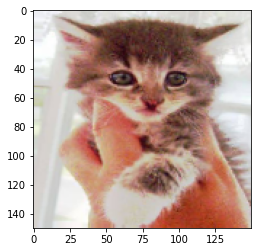

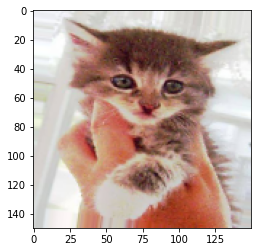

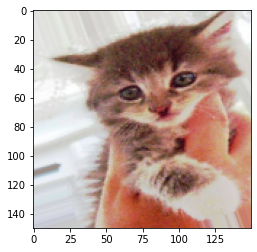

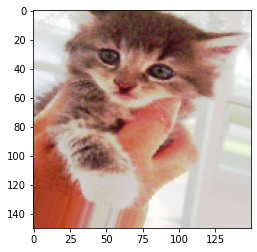

In [38]:
from keras.preprocessing import image # 이미지 전처리 유틸리트 모듈

fnames = sorted([os.path.join(train_cats_dir, fname) for
                 fname in os.listdir(train_cats_dir)])

img_path = fnames[3] # 증식할 이미지를 선택함

img = image.load_img(img_path, target_size=(150,150))   # 이미지를 읽고 크기를 변경함

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i += 1
  if i % 4 == 0:
      break
plt.show()

In [ ]:
# 드롭아웃을 포함한 새로운 컨브넷 정의하기

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [ ]:
# 데이터 증식 제너레이터를 사용하여 컨브넷 훈련하기

In [39]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255) #검증 데이터는 증식되어서는 안됨

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지를 150 × 150 크기로 바꿉니다
        target_size=(150, 150),
        batch_size=32,
        # binary_crossentropy 손실을 사용하기 때문에 이진 레이블을 만들어야 합니다
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 39s 389ms/step - loss: 1.1019 - acc: 0.5079 - val_loss: 0.7109 - val_acc: 0.5032
Epoch 2/100
100/100 [==============================] - 32s 320ms/step - loss: 0.6911 - acc: 0.5221 - val_loss: 0.6818 - val_acc: 0.6037
Epoch 3/100
100/100 [==============================] - 31s 314ms/step - loss: 0.6771 - acc: 0.5767 - val_loss: 0.6281 - val_acc: 0.6180
Epoch 4/100
100/100 [==============================] - 31s 313ms/step - loss: 0.6655 - acc: 0.6010 - val_loss: 0.6638 - val_acc: 0.6347
Epoch 5/100
100/100 [==============================] - 31s 310ms/step - loss: 0.6472 - acc: 0.6310 - val_loss: 0.7266 - val_acc: 0.6288
Epoch 6/100
100/100 [==============================] - 34s 343ms/step - loss: 0.6330 - acc: 0.6501 - val_loss: 0.5556 - val_acc: 0.7049
Epoch 7/100
100/100 [==============================] - 32s 316ms/step - loss: 0.6315 - acc: 0.6531 -

In [40]:
model.save('cats_and_dogs_small_2.h5')

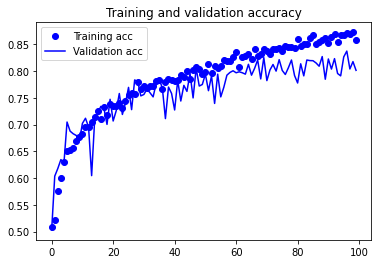

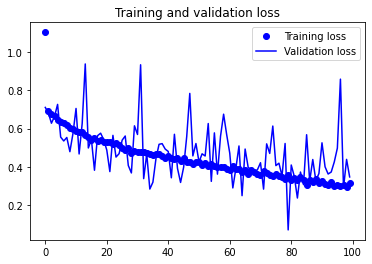

In [41]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()